# Portfolio

In [24]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from sklearn import covariance

import pyfolio as pf

import datetime as dt
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

In [4]:
tickers  = ['AMD', 'AMZN', 'BAC', 'META', 'AVGO', 'TER']
amounts  = [20, 10, 30, 10, 2, 5]

In [5]:
portfolio = {
    'AMD': {
                'amount': 20,
                'date': dt.datetime(2023, 9, 30)
           },
    'AMZN': {
                'amount': 10,
                'date': dt.datetime(2023, 9, 30)
           },
    'BAC': {
                'amount': 30,
                'date': dt.datetime(2023, 9, 30)
           },
    'META': {
                'amount': 10,
                'date': dt.datetime(2023, 9, 30)
           },
    'AVGO': {
            'amount': 2,
            'date': dt.datetime(2024, 4, 25)
       },
    'TER': {
            'amount': 5,
            'date': dt.datetime(2024, 4, 25)
       },
}

In [6]:
# dl = []
# for ticker in list(portfolio.items()):
#     print(ticker[0], ticker[1]['date'])
#     dl.append(
#         [ticker[0],
#         yf.download(ticker[0], ticker[1]['date'], dt.datetime.now(), auto_adjust=True)]
#     )
# dl.head()

In [7]:
df = yf.download(list(portfolio.keys()), dt.datetime(2023, 1, 1), dt.datetime.now(), auto_adjust=True)
df.head()

[*********************100%***********************]  6 of 6 completed


Close                                                \
                  AMD       AMZN        AVGO        BAC        META   
Date                                                                  
2023-01-03  64.019997  85.820000  538.868469  32.270802  124.607788   
2023-01-04  64.660004  85.139999  545.450012  32.877502  127.235008   
2023-01-05  62.330002  83.120003  540.367798  32.810093  126.805458   
2023-01-06  63.959999  86.080002  572.895752  33.137516  129.882202   
2023-01-09  67.239998  87.360001  561.660522  32.636745  129.332779   

                            High                                    ...  \
                  TER        AMD       AMZN        AVGO        BAC  ...   
Date                                                                ...   
2023-01-03  85.455460  66.879997  86.959999  552.586529  32.829355  ...   
2023-01-04  86.937225  65.790001  86.980003  553.160913  33.532356  ...   
2023-01-05  86.638893  64.349998  85.419998  545.060560  32.877504  ...   
2023-01-06  90.736130  64.300003  86.400002  575.397912  33.301231  ...   
2023-01-09  92.695251  69.320000  89.480003  585.786317  33.474572  ...   

                  Open                                      Volume            \
                  AVGO        BAC        META        TER       AMD      AMZN   
Date                                                                           
2023-01-03  550.084368  32.001157  122.689825  88.359332  46851800  76706000   
2023-01-04  548.127414  32.646380  127.244992  86.758219  47477100  68885100   
2023-01-05  541.039585  32.665638  125.996311  86.360433  46159500  67930800   
2023-01-06  548.253925  32.829350  128.833312  87.792477  70161300  83303400   
2023-01-09  576.663683  33.464943  131.020990  92.426746  69741300  65266100   

                                                  
               AVGO       BAC      META      TER  
Date                                              
2023-01-03  2017300  35221500  35528500  1033200  
2023-01-04  1707400  41998500  32397100  2025400  
2023-01-05  1627700  34177000  25447100   998700  
2023-01-06  3526100  34068700  27584500  1444500  
2023-01-09  3773900  43818800  26649100  1654500  

[5 rows x 30 columns]

In [8]:
prices = df['Close']

In [9]:
prices

,AMD,AMZN,AVGO,BAC,META,TER
Date,,,,,,
2023-01-03,64.019997,85.820000,538.868469,32.270802,124.607788,85.455460
2023-01-04,64.660004,85.139999,545.450012,32.877502,127.235008,86.937225
2023-01-05,62.330002,83.120003,540.367798,32.810093,126.805458,86.638893
2023-01-06,63.959999,86.080002,572.895752,33.137516,129.882202,90.736130
2023-01-09,67.239998,87.360001,561.660522,32.636745,129.332779,92.695251
...,...,...,...,...,...,...
2024-04-22,148.639999,177.229996,1224.459961,37.730000,481.730011,97.760002
2024-04-23,152.270004,179.539993,1249.189941,38.369999,496.100006,99.849998
2024-04-24,151.740005,176.589996,1256.819946,38.320000,493.500000,100.699997


In [10]:
total = []
for t, am in zip(tickers, amounts):
    total.append(prices[t][-1] * am)

## Returns

In [11]:
prices

,AMD,AMZN,AVGO,BAC,META,TER
Date,,,,,,
2023-01-03,64.019997,85.820000,538.868469,32.270802,124.607788,85.455460
2023-01-04,64.660004,85.139999,545.450012,32.877502,127.235008,86.937225
2023-01-05,62.330002,83.120003,540.367798,32.810093,126.805458,86.638893
2023-01-06,63.959999,86.080002,572.895752,33.137516,129.882202,90.736130
2023-01-09,67.239998,87.360001,561.660522,32.636745,129.332779,92.695251
...,...,...,...,...,...,...
2024-04-22,148.639999,177.229996,1224.459961,37.730000,481.730011,97.760002
2024-04-23,152.270004,179.539993,1249.189941,38.369999,496.100006,99.849998
2024-04-24,151.740005,176.589996,1256.819946,38.320000,493.500000,100.699997


In [12]:
prices['portfolio'] = 0
prices

f:\python\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,AMD,AMZN,AVGO,BAC,META,TER,portfolio
Date,,,,,,,
2023-01-03,64.019997,85.820000,538.868469,32.270802,124.607788,85.455460,0
2023-01-04,64.660004,85.139999,545.450012,32.877502,127.235008,86.937225,0
2023-01-05,62.330002,83.120003,540.367798,32.810093,126.805458,86.638893,0
2023-01-06,63.959999,86.080002,572.895752,33.137516,129.882202,90.736130,0
2023-01-09,67.239998,87.360001,561.660522,32.636745,129.332779,92.695251,0
...,...,...,...,...,...,...,...
2024-04-22,148.639999,177.229996,1224.459961,37.730000,481.730011,97.760002,0
2024-04-23,152.270004,179.539993,1249.189941,38.369999,496.100006,99.849998,0
2024-04-24,151.740005,176.589996,1256.819946,38.320000,493.500000,100.699997,0


In [13]:
for i in portfolio.keys():
    prices['portfolio'] += prices[i]*portfolio[i]['amount']

f:\python\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [14]:
for t in prices.columns:
    prices[f'{t}_returns'] = np.log(prices[t].div(prices[t].shift(1)))

prices

,AMD,AMZN,AVGO,BAC,META,TER,portfolio,AMD_returns,AMZN_returns,AVGO_returns,BAC_returns,META_returns,TER_returns,portfolio_returns
Date,,,,,,,,,,,,,,
2023-01-03,64.019997,85.820000,538.868469,32.270802,124.607788,85.455460,5857.816093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,64.660004,85.139999,545.450012,32.877502,127.235008,86.937225,5928.861374,0.009947,-0.007955,0.012140,0.018626,0.020865,0.017191,0.012055
2023-01-05,62.330002,83.120003,540.367798,32.810093,126.805458,86.638893,5844.087494,-0.036700,-0.024012,-0.009361,-0.002052,-0.003382,-0.003437,-0.014402
2023-01-06,63.959999,86.080002,572.895752,33.137516,129.882202,90.736130,6032.419655,0.025815,0.034992,0.058454,0.009930,0.023974,0.046207,0.031718
2023-01-09,67.239998,87.360001,561.660522,32.636745,129.332779,92.695251,6077.627419,0.050010,0.014760,-0.019806,-0.015227,-0.004239,0.021362,0.007466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-22,148.639999,177.229996,1224.459961,37.730000,481.730011,97.760002,13632.019974,0.013547,0.014779,0.016261,0.020349,0.001371,0.018480,0.010608
2024-04-23,152.270004,179.539993,1249.189941,38.369999,496.100006,99.849998,13950.529922,0.024128,0.012950,0.019995,0.016820,0.029394,0.021154,0.023096
2024-04-24,151.740005,176.589996,1256.819946,38.320000,493.500000,100.699997,13902.439941,-0.003487,-0.016567,0.006089,-0.001304,-0.005255,0.008477,-0.003453


In [15]:
prices.dropna(inplace=True)

f:\python\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


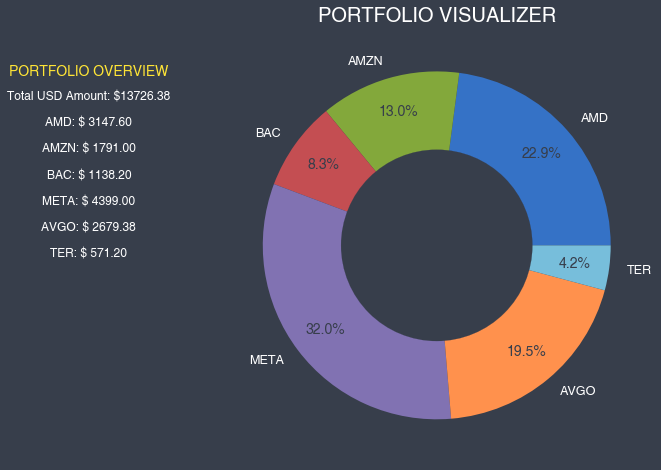

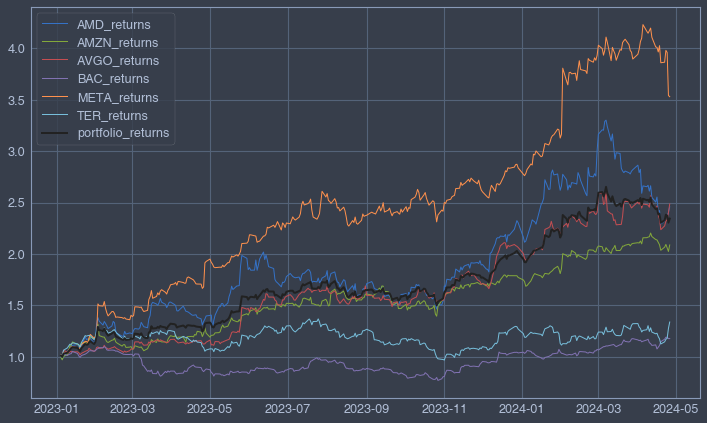

In [16]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title('PORTFOLIO VISUALIZER', color='w', fontsize=20)

patches, texts, autotexts = ax.pie(total, labels=tickers, autopct="%1.1f%%", pctdistance=0.8);

[text.set_color('w') for text in texts]
[autotext.set_color('#373E4B') for autotext in autotexts]
[autotext.set_fontsize(14) for autotext in autotexts]

my_circle = plt.Circle((0, 0), 0.55, color='#373E4B')
plt.gca().add_artist(my_circle)

ax.text(-2, 1, 'PORTFOLIO OVERVIEW', fontsize=14,
                                     color='#ffe536',
                                     verticalalignment='center',
                                     horizontalalignment='center')

ax.text(-2, 0.85, f'Total USD Amount: ${sum(total):.2f}',
                                        fontsize=12, color='w',
                                        verticalalignment='center',
                                        horizontalalignment='center')

counter = 0.15
for ticker in tickers:
    ax.text(-2, 0.85-counter, f'{ticker}: ${total[tickers.index(ticker)]: .2f}',
                              fontsize=12, color='w',
                              verticalalignment='center',
                              horizontalalignment='center')
    counter += 0.15

fig, ax = plt.subplots()
for t in prices.columns:
    if 'returns' in t:
        line_width = 1
        if t == 'portfolio_returns':
            line_width = 2
        ax.plot(prices.index, prices[t].cumsum().apply(np.exp), linewidth=line_width, label=t)

plt.legend()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Start date,2019-04-29
End date,2024-04-26
Total months,59
,Backtest
Annual return,26.9%
Cumulative returns,228.8%
Annual volatility,32.0%
Sharpe ratio,0.91
Calmar ratio,0.55
Stability,0.66
Max drawdown,-48.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,48.80,2021-12-27,2022-11-03,2023-12-14,514
1,33.60,2020-02-19,2020-03-18,2020-06-04,77
2,13.25,2020-09-02,2020-09-23,2020-11-16,54
3,13.16,2019-05-03,2019-06-03,2019-07-01,42
4,11.98,2019-07-24,2019-08-23,2019-11-04,74


Stress Events,mean,min,max
New Normal,0.11%,-13.08%,10.59%


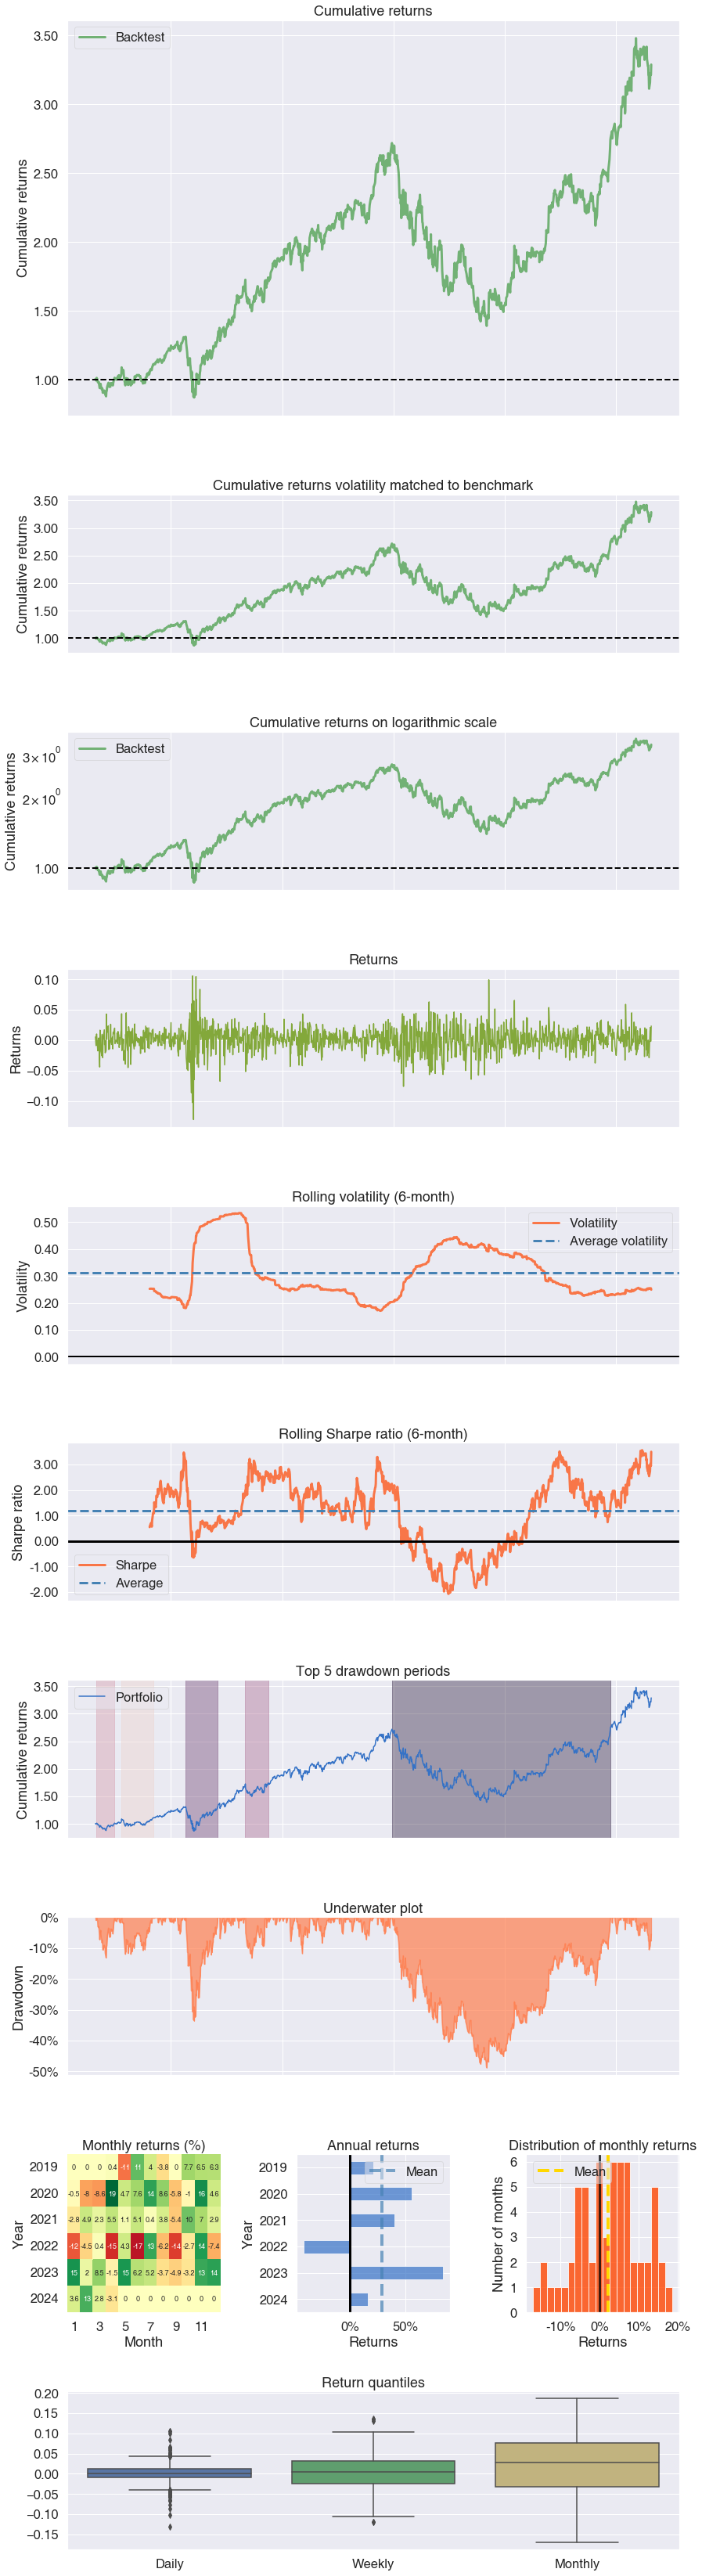

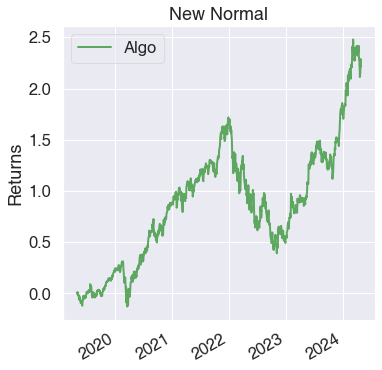

In [17]:
data = pd.DataFrame(columns=tickers)

for ticker in tickers:
     data[ticker] = yf.download(ticker, period='5y',)['Adj Close']
        
data = data.pct_change().dropna().mean(axis=1)

pf.create_full_tear_sheet(data)

## Covariance

In [19]:
returns = prices[['AMD_returns', 'AMZN_returns', 'BAC_returns', 'META_returns', 'AVGO_returns', 'TER_returns']]
returns

,AMD_returns,AMZN_returns,BAC_returns,META_returns,AVGO_returns,TER_returns
Date,,,,,,
2023-01-04,0.009947,-0.007955,0.018626,0.020865,0.012140,0.017191
2023-01-05,-0.036700,-0.024012,-0.002052,-0.003382,-0.009361,-0.003437
2023-01-06,0.025815,0.034992,0.009930,0.023974,0.058454,0.046207
2023-01-09,0.050010,0.014760,-0.015227,-0.004239,-0.019806,0.021362
2023-01-10,0.011974,0.028327,0.006764,0.026825,-0.003404,0.016703
...,...,...,...,...,...,...
2024-04-22,0.013547,0.014779,0.020349,0.001371,0.016261,0.018480
2024-04-23,0.024128,0.012950,0.016820,0.029394,0.019995,0.021154
2024-04-24,-0.003487,-0.016567,-0.001304,-0.005255,0.006089,0.008477


In [20]:
cov_matrix = returns.cov()
cov_matrix

,AMD_returns,AMZN_returns,BAC_returns,META_returns,AVGO_returns,TER_returns
AMD_returns,0.000914,0.000294,0.000060,0.000329,0.000351,0.000372
AMZN_returns,0.000294,0.000389,0.000045,0.000304,0.000168,0.000164
BAC_returns,0.000060,0.000045,0.000262,0.000069,0.000057,0.000116
META_returns,0.000329,0.000304,0.000069,0.000651,0.000195,0.000148
AVGO_returns,0.000351,0.000168,0.000057,0.000195,0.000447,0.000292
TER_returns,0.000372,0.000164,0.000116,0.000148,0.000292,0.000461


In [33]:
np.cov(returns['AMD_returns'], returns['META_returns'])

array([[0.00091407, 0.00032863],
       [0.00032863, 0.00065132]])

In [21]:
corr_matrix = returns.corr()

In [22]:
corr_matrix

,AMD_returns,AMZN_returns,BAC_returns,META_returns,AVGO_returns,TER_returns
AMD_returns,1.000000,0.493429,0.121969,0.425909,0.549410,0.573968
AMZN_returns,0.493429,1.000000,0.141546,0.603626,0.403646,0.388408
BAC_returns,0.121969,0.141546,1.000000,0.167849,0.166662,0.333280
META_returns,0.425909,0.603626,0.167849,1.000000,0.361867,0.269316
AVGO_returns,0.549410,0.403646,0.166662,0.361867,1.000000,0.644451
TER_returns,0.573968,0.388408,0.333280,0.269316,0.644451,1.000000


<AxesSubplot:>

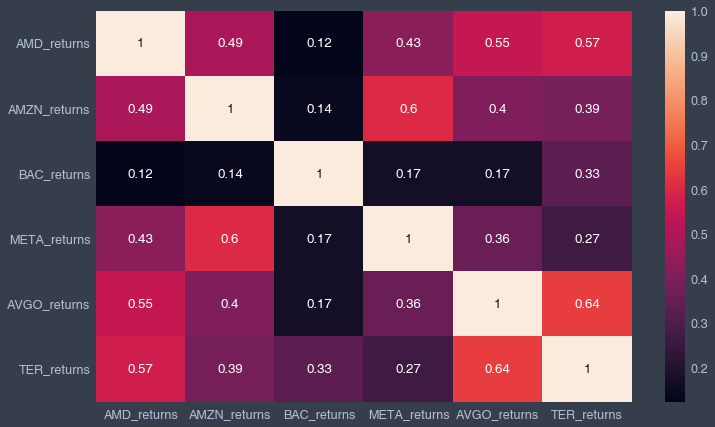

In [25]:
sns.heatmap(corr_matrix, annot=True)

In [26]:
lw = covariance.ledoit_wolf(returns)[0]
lw

array([[8.93049769e-04, 2.79567384e-04, 5.66956271e-05, 3.12386805e-04,
        3.33879492e-04, 3.54043373e-04],
       [2.79567384e-04, 3.93599846e-04, 4.29033632e-05, 2.88693081e-04,
        1.59950845e-04, 1.56224697e-04],
       [5.66956271e-05, 4.29033632e-05, 2.72826131e-04, 6.58607346e-05,
        5.41827013e-05, 1.09979130e-04],
       [3.12386805e-04, 2.88693081e-04, 6.58607346e-05, 6.43280483e-04,
        1.85630226e-04, 1.40228475e-04],
       [3.33879492e-04, 1.59950845e-04, 5.41827013e-05, 1.85630226e-04,
        4.49178001e-04, 2.78023897e-04],
       [3.54043373e-04, 1.56224697e-04, 1.09979130e-04, 1.40228475e-04,
        2.78023897e-04, 4.62042952e-04]])

In [27]:
dates = returns.resample('M').first().index
dates

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [28]:
sample_covs = []
lw_covs = []

for i in range(1, len(dates)):
    sample_cov = returns[dates[i-1]:dates[i]].cov().values
    sample_covs.append(sample_cov)
    
    lw_cov = covariance.ledoit_wolf(returns[dates[i-1]:dates[i]])[0]
    lw_covs.append(lw_cov)

lw_diffs = []
for pair in zip(lw_covs[:-1], lw_covs[1:]):
    diff = np.mean(np.sum(np.abs(pair[0] - pair[1])))
    lw_diffs.append(diff)
    
sample_diffs = []
for pair in zip(sample_covs[:-1], sample_covs[1:]):
    diff = np.mean(np.sum(np.abs(pair[0] - pair[1])))
    sample_diffs.append(diff)

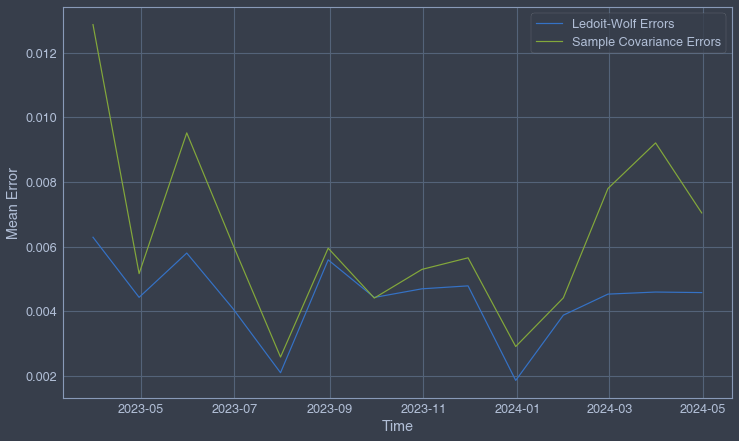

In [29]:
plt.plot(dates[2:], lw_diffs)
plt.plot(dates[2:], sample_diffs)
plt.xlabel('Time')
plt.ylabel('Mean Error')
plt.legend(['Ledoit-Wolf Errors', 'Sample Covariance Errors']);

In [30]:
s_returns = [col for col in prices.columns if '_returns' in col and col != 'portfolio_returns']
s_returns

['AMD_returns',
 'AMZN_returns',
 'AVGO_returns',
 'BAC_returns',
 'META_returns',
 'TER_returns']

In [31]:
returns_pair_pairs = [(a, b) for idx, a in enumerate(s_returns) for b in s_returns[idx + 1:]]
returns_pair_pairs

[('AMD_returns', 'AMZN_returns'),
 ('AMD_returns', 'AVGO_returns'),
 ('AMD_returns', 'BAC_returns'),
 ('AMD_returns', 'META_returns'),
 ('AMD_returns', 'TER_returns'),
 ('AMZN_returns', 'AVGO_returns'),
 ('AMZN_returns', 'BAC_returns'),
 ('AMZN_returns', 'META_returns'),
 ('AMZN_returns', 'TER_returns'),
 ('AVGO_returns', 'BAC_returns'),
 ('AVGO_returns', 'META_returns'),
 ('AVGO_returns', 'TER_returns'),
 ('BAC_returns', 'META_returns'),
 ('BAC_returns', 'TER_returns'),
 ('META_returns', 'TER_returns')]

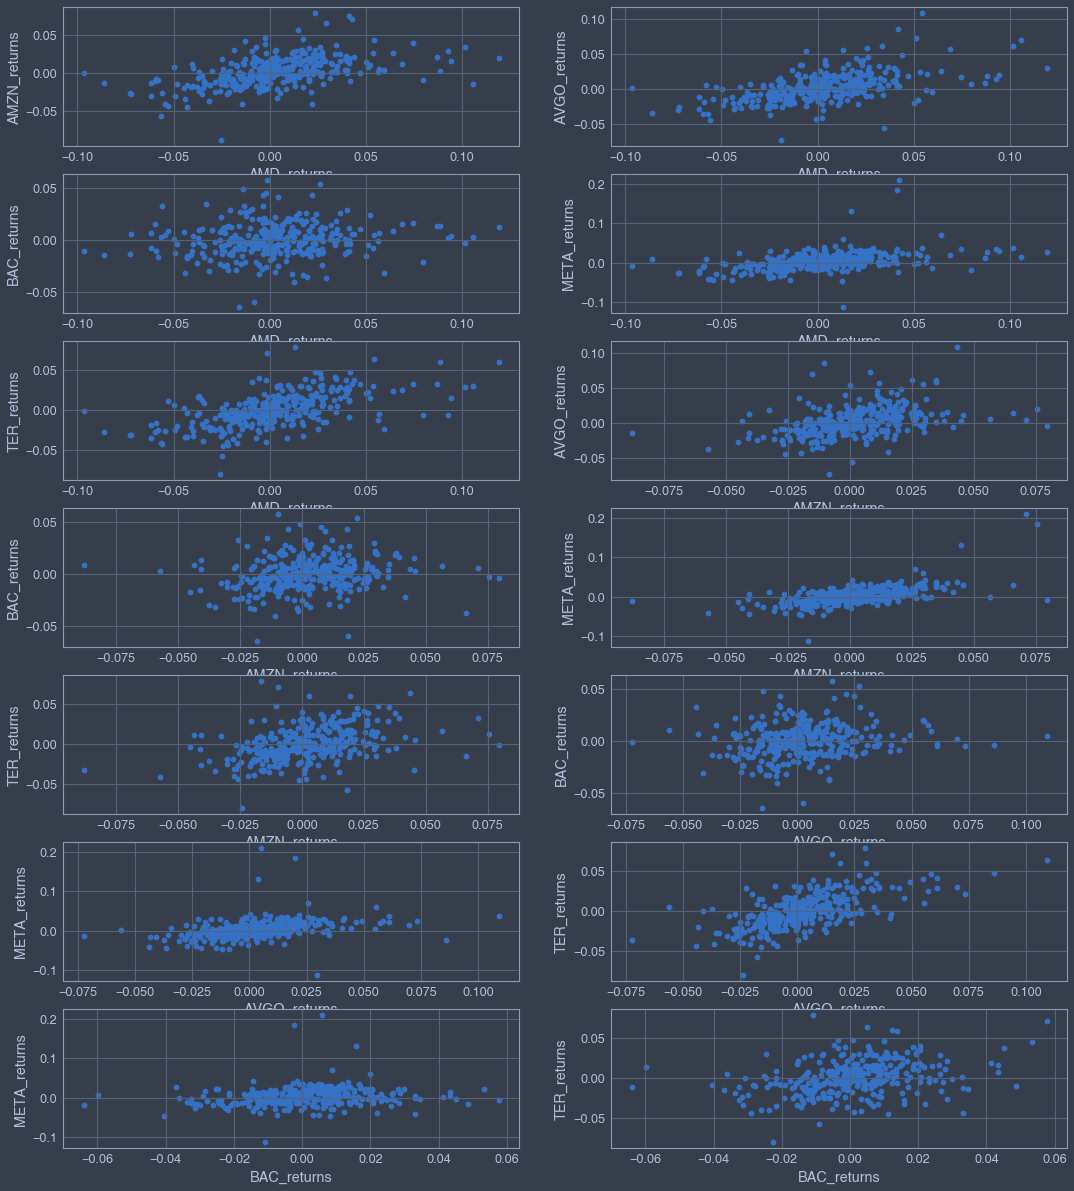

In [32]:
fig, axs = plt.subplots(int(len(returns_pair_pairs)/2), 2, figsize=(18, 21))

i = 0
for x in range(0, int(len(returns_pair_pairs)/2)):
    for y in range(0, 2):
        axs[x, y].scatter(prices[returns_pair_pairs[i][0]], prices[returns_pair_pairs[i][1]])
        axs[x, y].set_xlabel(returns_pair_pairs[i][0])
        axs[x, y].set_ylabel(returns_pair_pairs[i][1])
        i+=1
